# How to interact with shell installed programs through python

### What are we going to learn

    - Basic command of the module OS, which allow us to employ shell commands via python
    - Basic knowledge of DUSTY and how to model SED and infrared spectra of DUST dominated astronomical sources
    - Bonus section

### The OS module

- This module allows the user to interact with the operating system and provides some functions that can replace shell commands (i.e. the terminal). Basically, it serves as the connection between Python and the operating system.

### The sys module

- This module, on the other hand, allows the user to interact with the Python environtment. Basically, it serves as the connection between Python and the terminal/Jupyter notebook (and its location in the operating system).
- We do not see it in this tutorial.

-The os.mkdir command function allows the user to create a folder in the same directory of the python script/Jupyter notebook

In [25]:
#First step: create a folder

import os
import matplotlib.pyplot as plt
import numpy as np
folder='DUSTY_MODELS'
os.mkdir(folder)

### DUSTY

- DUSTY is a radiative transfer code that performs models for the observed spectra of radiation sources behind a layer of dust. It works with two geometries, spherical and planar, and accepts a great range of input parameters. In this way, DUSTY is able to reproduce the observed Spectral Energy Distribution (SED) and low resolution spectra of a variety of astronomical sources. 

### DUSTY input parameters

1) External radiation:                                             
        Spectrum =  1  
        Number of BB =  1
        Temperature = 1500 K
        
2) Dust Properties 
     
       2.1 Chemical composition                       
           optical properties index = 1
           Abundances for supported grain types:
               Sil-Ow  Sil-Oc  Sil-DL  grf-DL  amC-Hn  SiC-Pg 
           x =  0.00    0.00    1.00    0.00    0.00    0.00
       
       2.2 Grain size distribution

        - size distribution = 2
        q = 3.5 ; a(min) = 0.005 ; a(max) = 0.25                        
                                                                        
       2.3 Dust temperature on inner boundary:

        - temperature = 1500 K


3) Density Distribution
        - density type = 1 ; N = 1 ; Y = 100e4 ; p = 2.2
        
        
        
4) Optical Depth     
        - grid type = 1                    % linear grid
        - lambda0 = 0.55 micron            % optical depth specified 
        - tau(min) = 5 tau(max) = 5 for the visual wavelength
        - number of models = 1

-The os.system function allows the user to use any shell command in the same directory of the python script/Jupyter notebook

In [27]:
# Run a simple DUSTY model with python

os.system('./dusty')

 Working on Input File: MODEL.inp                                                                       
 model =    1


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


0

-The os.rename function allows the user to move a file in the operating system

In [28]:
os.rename("MODEL.s001", "DUSTY_MODELS/MODEL_BASIC.txt")

In [29]:
def read_file(file):
    X=np.array([])
    Y=np.array([])
    k=np.array([])
    k2=np.array([])
    k3=np.array([])
    k4=np.array([])
    f= open(file,'r') 
    for linea in f:
        if linea[0]=='#':
           pass
        else:
            X=np.append(X,float(linea[0:12]))
            Y=np.append(Y,float(linea[12:23])) 
            k=np.append(k,float(linea[23:34]))
            k2=np.append(k2,float(linea[34:45]))
            k3=np.append(k3,float(linea[45:56]))
            k4=np.append(k4,float(linea[56:67]))
            
    return(X,Y*X,k,k2,k3,k4)

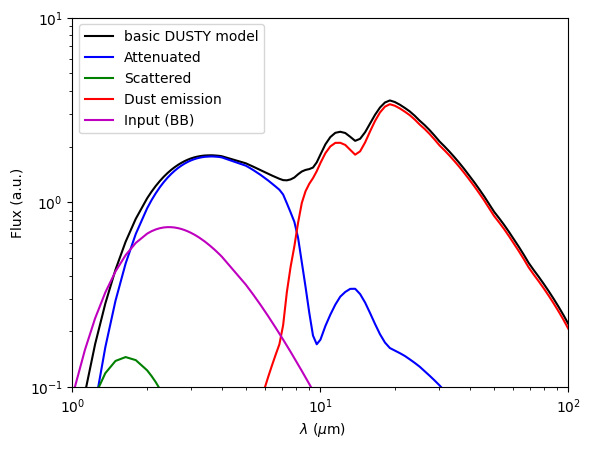

In [31]:
X, Y, Y2, Y3, Y4, Y5 =read_file('DUSTY_MODELS/MODEL_BASIC.txt')
plt.plot(X,Y,'k-',label='basic DUSTY model')
plt.plot(X,Y*Y2,'b-',label='Attenuated')
plt.plot(X,Y*Y3,'g-',label='Scattered')
plt.plot(X,Y*Y4,'r-',label='Dust emission')
plt.plot(X,Y5,'m-',label='Input (BB)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Flux (a.u.)')
plt.xlabel(' $\lambda$ ($\mu$m)')
plt.xlim(1,100)
plt.ylim(10**-1,10**1)
plt.legend()

In [32]:
def change_line(Tinn):
   with open('MODEL.inp', 'r') as file: 
      data = file.readlines() 
   data[50] ='         - temperature = '+str(Tinn)+' K\n'
   with open('MODEL.inp', 'w') as file: 
      file.writelines(data) 

- We produce a grid changing one parameter: the inner radius temperature

In [34]:
Temperatures=np.array([1500,1200,800,400])
for j in range(4):
    _=change_line(Temperatures[j])
    os.system('./dusty')
    os.rename('MODEL.s001', 'DUSTY_MODELS/MODEL_'+str(Temperatures[j])+'.txt')
    

 Working on Input File: MODEL.inp                                                                       
 model =    1


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Working on Input File: MODEL.inp                                                                       
 model =    1


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Working on Input File: MODEL.inp                                                                       
 model =    1


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 Working on Input File: MODEL.inp                                                                       
 model =    1


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


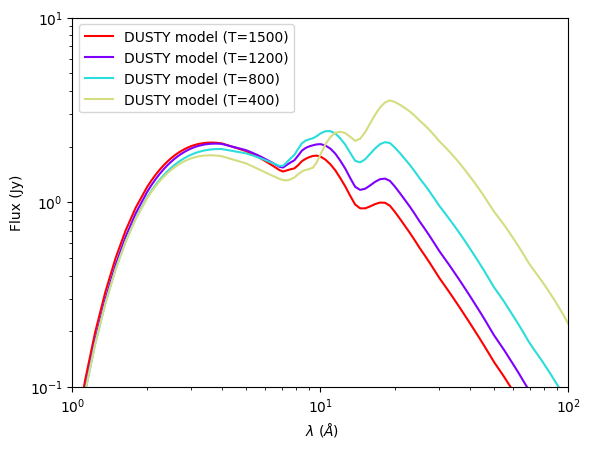

In [35]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 4))
for j in range(4):
    X, Y, Y2, Y3, Y4, Y5 =read_file('DUSTY_MODELS/MODEL_'+str(Temperatures[j])+'.txt')
    plt.plot(X,Y,'-',color=colors[j-1],label='DUSTY model (T='+str(Temperatures[j])+')')

plt.xscale('log')
plt.yscale('log')
plt.ylabel('Flux (Jy)')
plt.xlabel(' $\lambda$ ($\AA$)')
plt.xlim(1,100)
plt.ylim(10**-1,10**1)
plt.legend()

### BONUS: exec and eval functions

In [36]:
a=1

In [37]:
exec('print(a)')

1


In [38]:
eval('print(a)')

1


In [39]:
exec('a=3')

In [40]:
print(a)

3


In [41]:
eval('a=5')

SyntaxError: invalid syntax (<string>, line 1)

### More information available on:

-https://docs.python.org/3/library/sys.html

-https://docs.python.org/3/library/os.html

-https://github.com/ivezic/dusty/tree/master